Average P_True: 0.7119501125844193
Average Confidence: 0.19854412623374748
Average Lexical Similarity: 0.5932685242857356
Average Avg Log Probability: -3.790365225042094
Average Semantic Entropy: 0.159585529353998
Average ROUGE-L Score: 0.6817885576855737


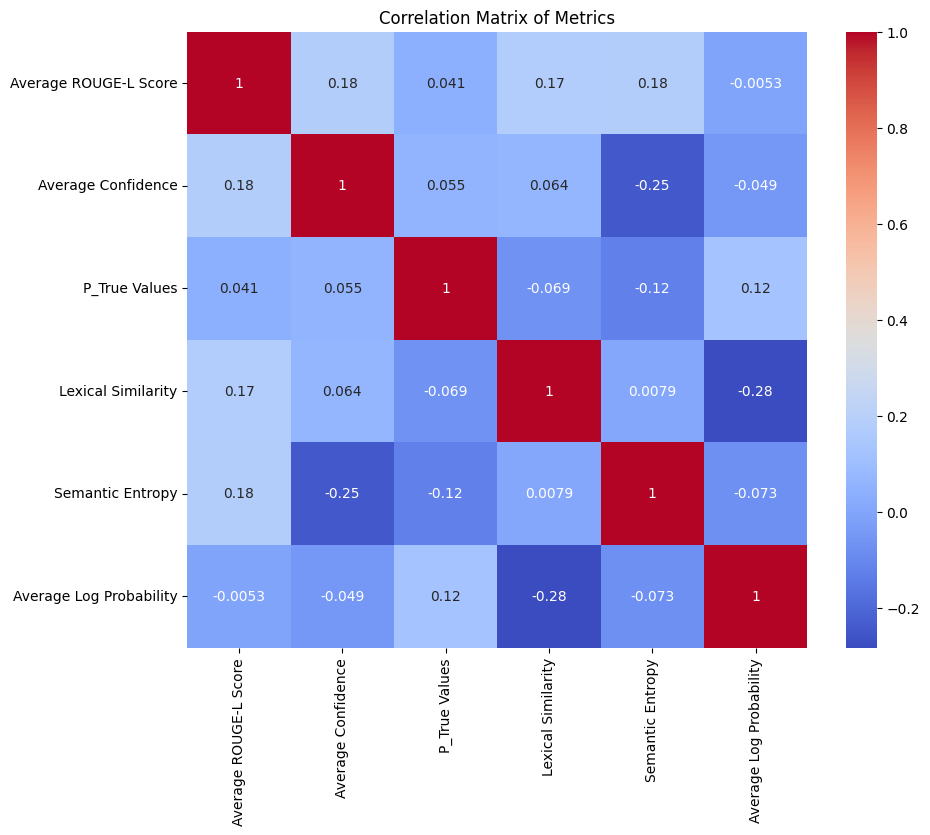

Spearman correlation between Average ROUGE-L score and Semantic Entropy: 0.2617685488312243
Spearman correlation between Average ROUGE-L score and Average Log Probability: 0.01688464211751882
Spearman correlation between p true values and Average Log Probability: 0.11401912591671615
Spearman correlation between p true values and Average Confidence: 0.17172440060465288
Spearman correlation between Lexical Similarity and Average Log probability: -0.28443046058487037
Spearman correlation between Semantic Entropy and Average Log probability: -0.004090053234661636
Spearman correlation between Semantic Entropy and Lexical Similarity: 0.0973709244023257


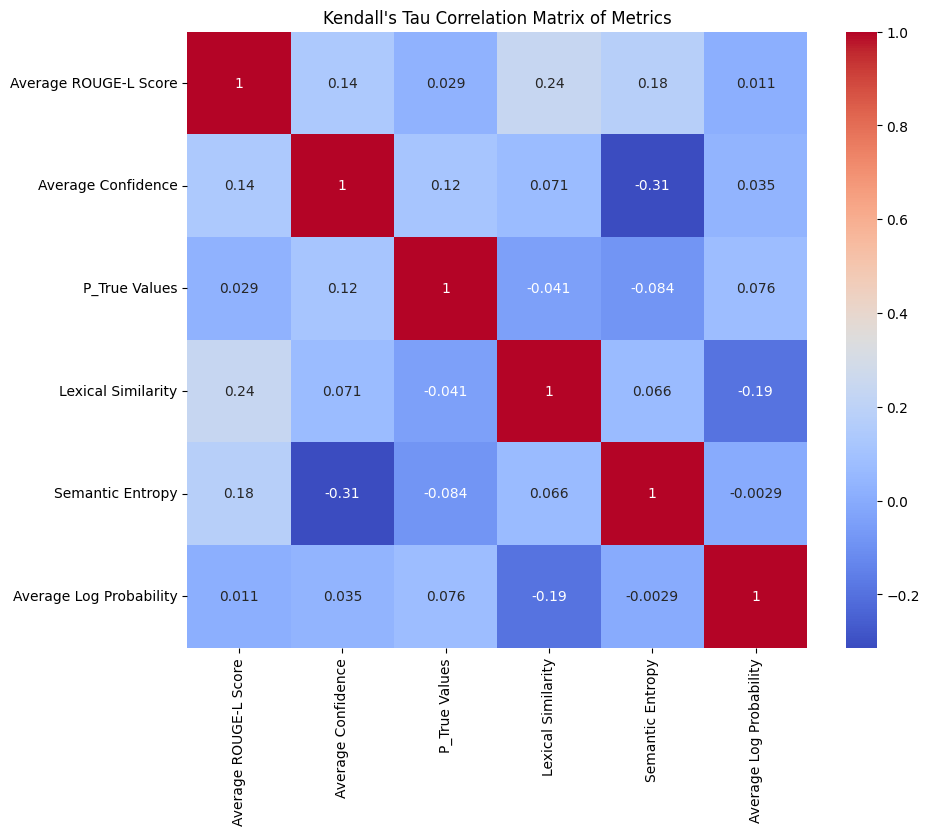

Point Biserial Correlation for Average ROUGE-L Score: SignificanceResult(statistic=0.015742422080561796, pvalue=0.666254290971165)
Point Biserial Correlation for Average Confidence: SignificanceResult(statistic=0.03896198614020773, pvalue=0.2856201574647436)
Point Biserial Correlation for Lexical Similarity: SignificanceResult(statistic=-0.053950300715557176, pvalue=0.13912436021700056)
Point Biserial Correlation for Semantic Entropy: SignificanceResult(statistic=-0.13012011653121827, pvalue=0.0003437198779349329)


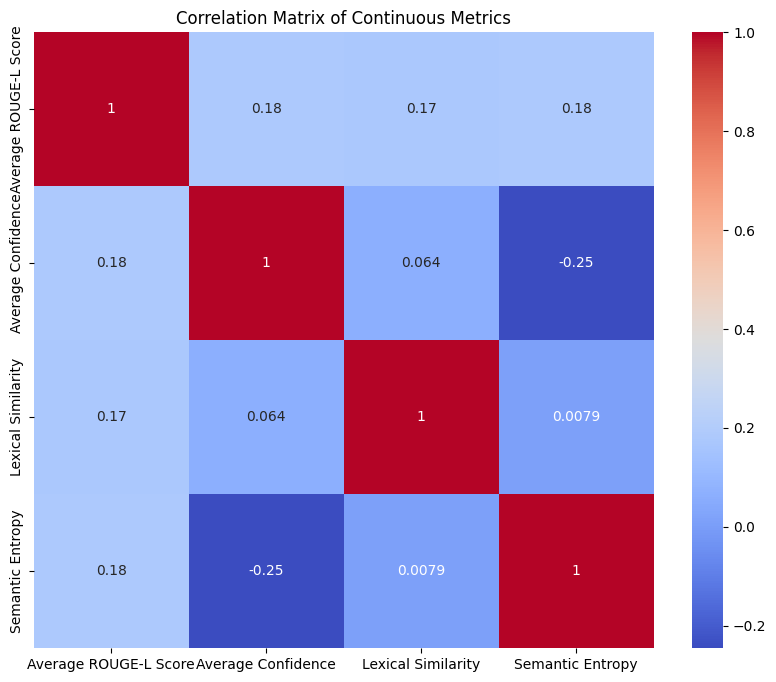

5/5 [==============================] - 0s 6ms/step - loss: 1.0796
Mean Squared Error on Test Set: 1.0796141624450684
5/5 [==============================] - 0s 4ms/step
Mean Squared Error: 1.0796141438284181
R-squared: 0.11628206175755096


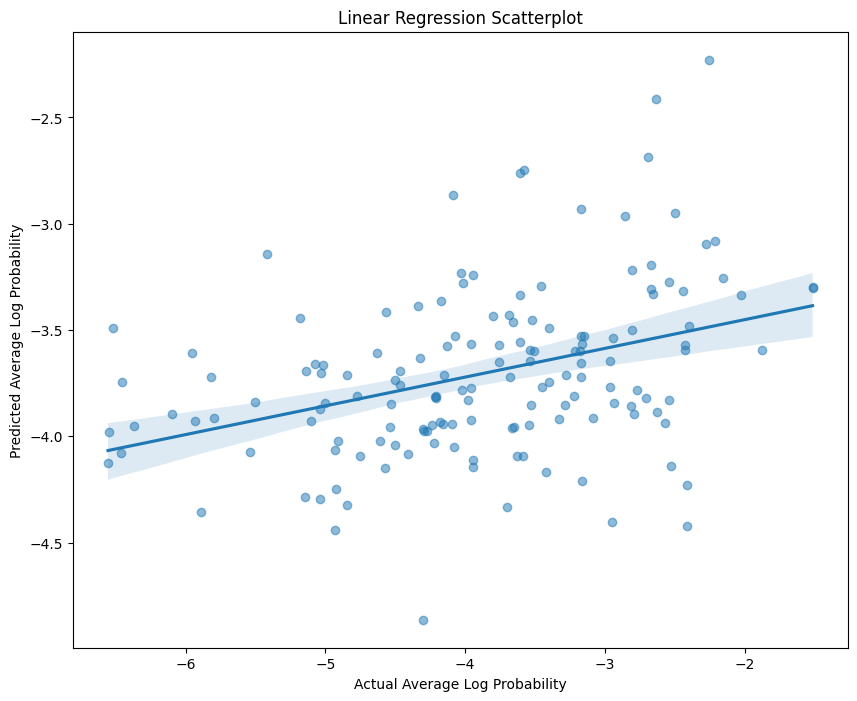

SVM Mean Squared Error: 1.0207723079900546
Kernel Ridge Mean Squared Error: 1.029435239761732


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process Mean Squared Error: 1.7159881342434853e-19


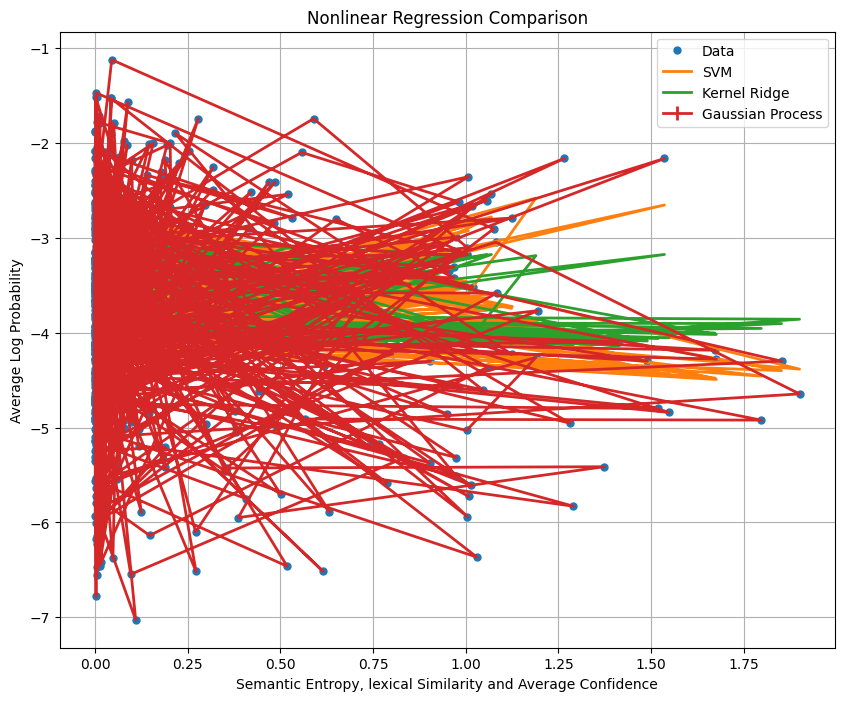

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


R-squared for 3D Plot: 0.09347382908744883
Mean Squared Error for 3D Plot: 1.0127894362161969


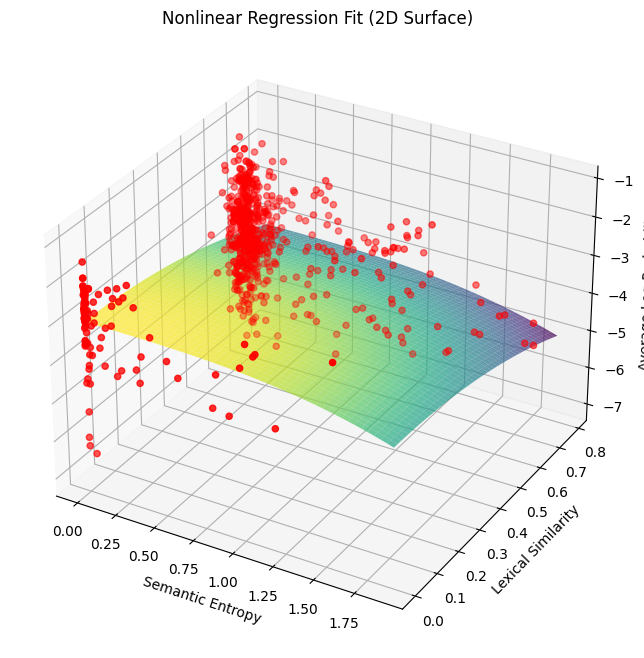

Kullback-Leibler Divergence of actual and predicted average log probability: -1.198078305160968


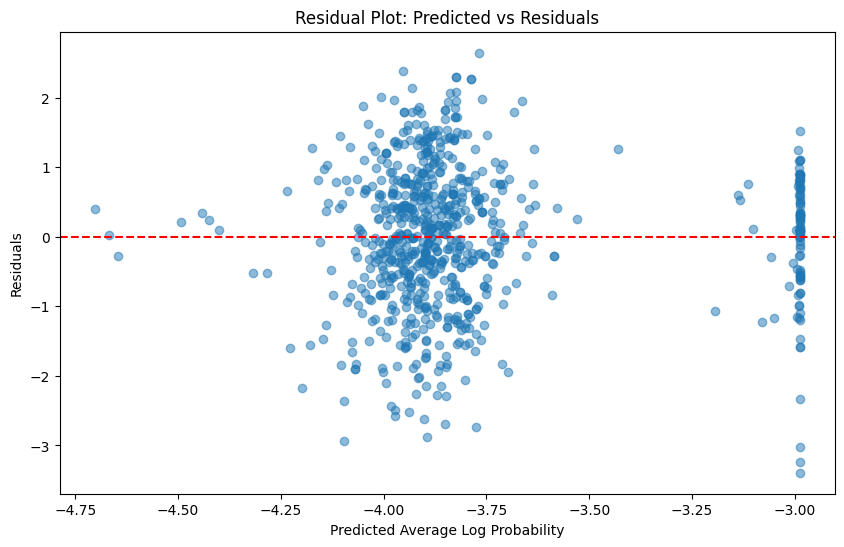

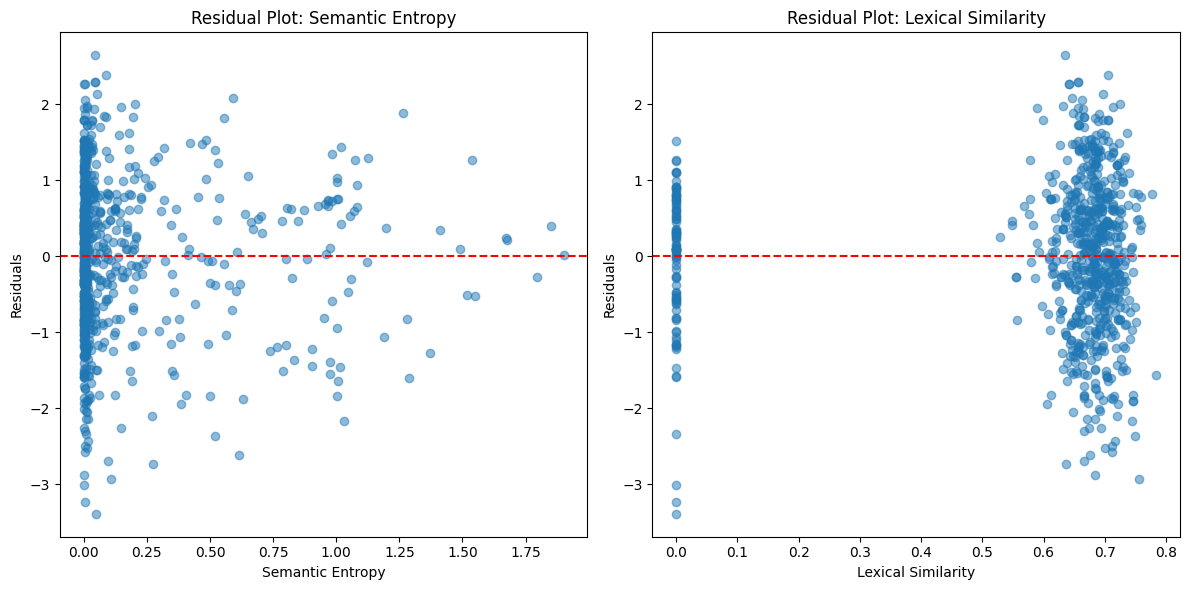

Average Cook's Distance: 1.0103419016570279
Kullback-Leibler Divergence between (semantic_entropy_list, lexical_similarity_list) and avg_log_prob_list: 5.248921295551861
Wasserstein Distance: 0.7107000554028973
Random Forest Mean Squared Error: 1.1420655191310596
Gradient Boosting Mean Squared Error: 1.116902830536304


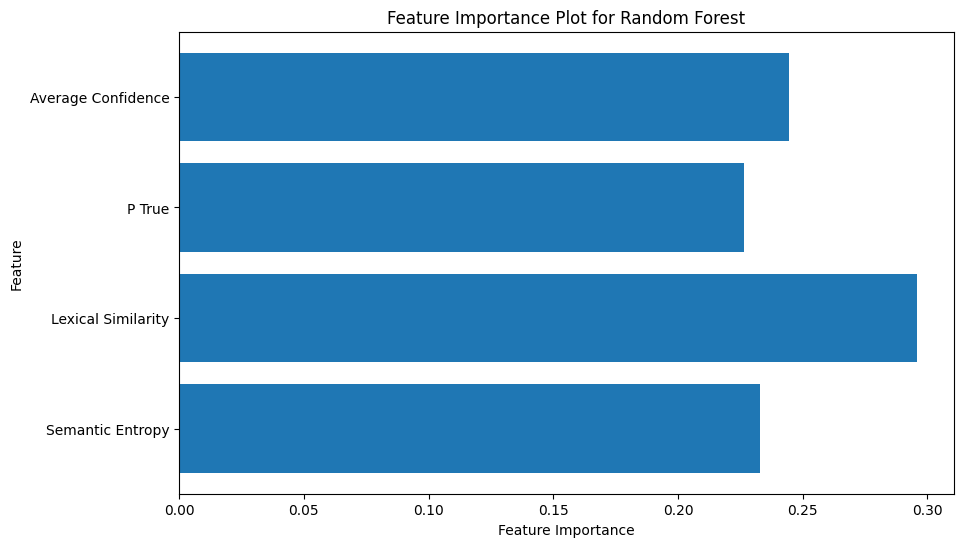

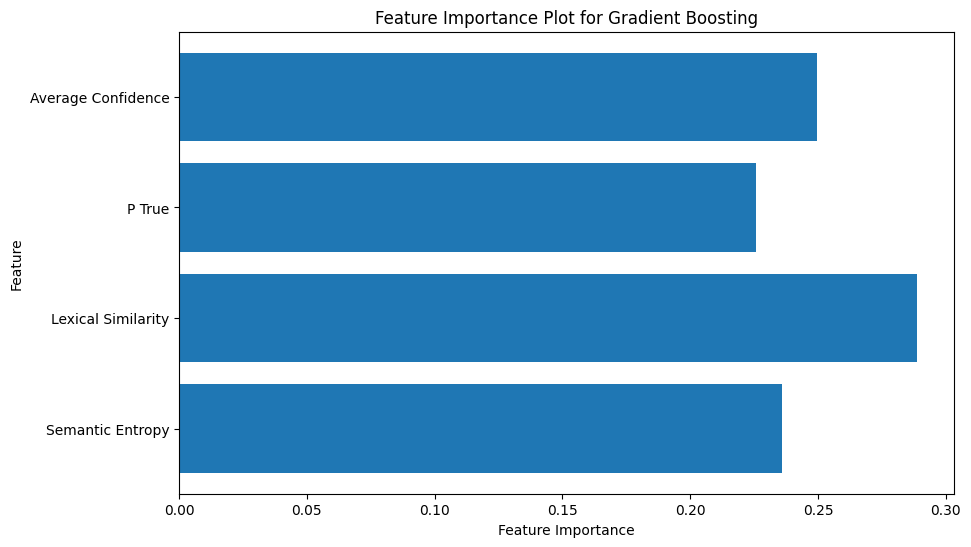

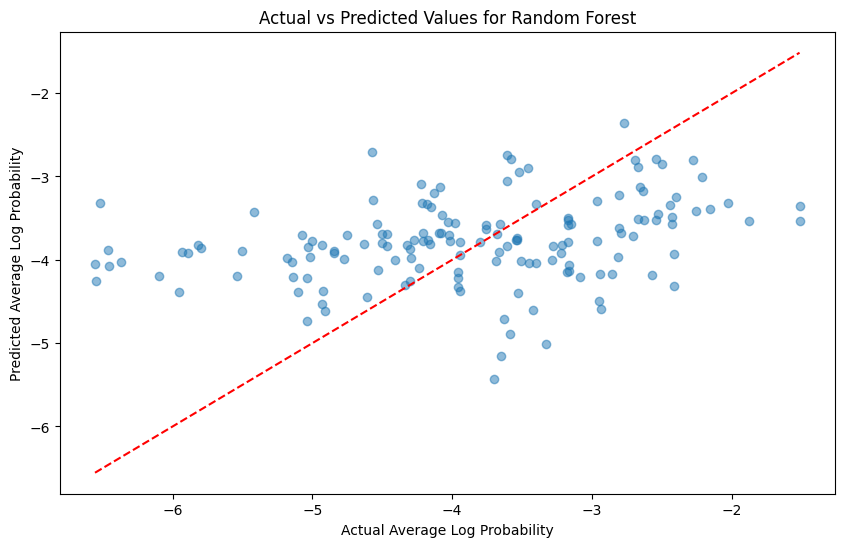

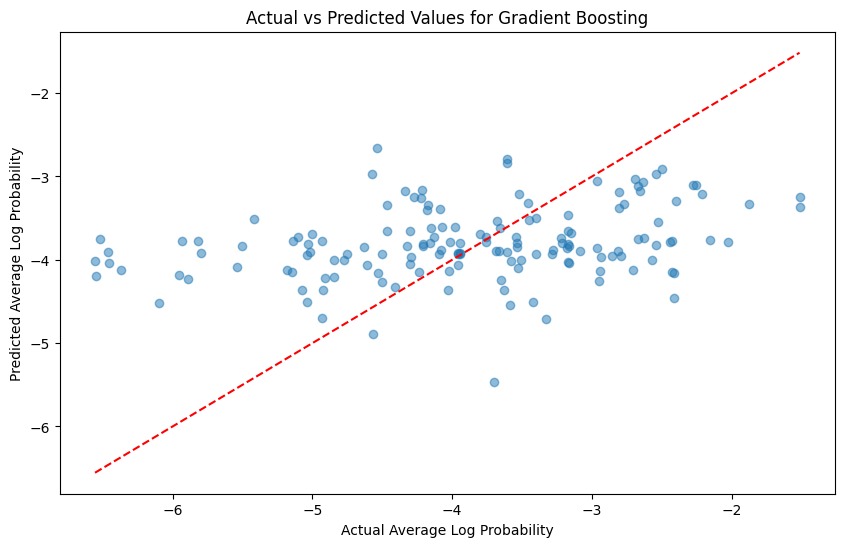

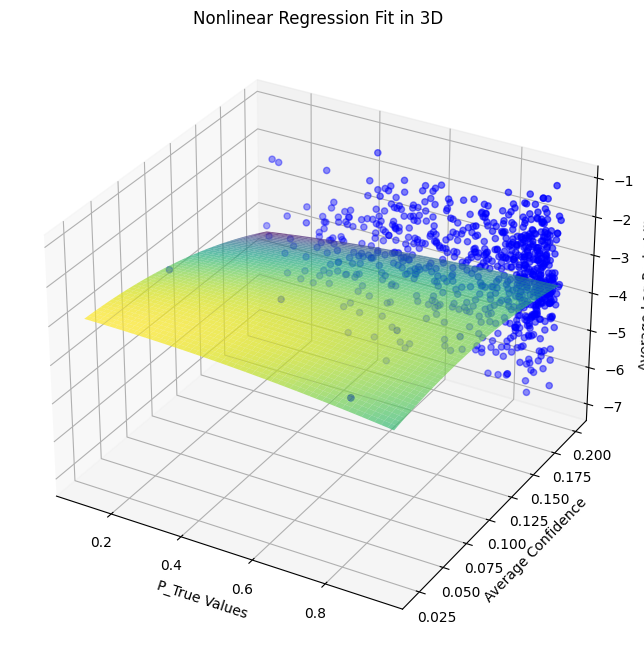

Kullback-Leibler Divergence between (p_true, confidence) and average log probability: 3.9932187560196484
Wasserstein Distance between (p_true, confidence) and average log probability: 6.712727132039229


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import scipy.stats as stats
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
from sklearn.metrics import brier_score_loss
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import entropy
from scipy.stats import wasserstein_distance
from scipy.stats import gaussian_kde
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load the JSON data
with open('question_entropy_data_deberta.json', 'r') as file:
    question_data = json.load(file)

# Initialize lists to store extracted values
average_confidence_list = []
average_rougeL_score_list = []
lexical_similarity_list = []
p_true_list = []
avg_log_prob_list = []
semantic_entropy_list = []

# Iterate over each entry in the JSON data
for entry in question_data:
    # Extract average confidence for each generated answer
    average_confidence = sum(gen_ans['confidence'] for gen_ans in entry['generated_answers']) / len(entry['generated_answers'])
    average_confidence_list.append(average_confidence)

    # Extract average rougeL_score for each generated answer
    average_rougeL_score = sum(gen_ans['rougeL_score'] for gen_ans in entry['generated_answers']) / len(entry['generated_answers'])
    average_rougeL_score_list.append(average_rougeL_score)

    # Extract lexical_similarity, p_true, avg_log_prob, and semantic_entropy
    lexical_similarity = entry['lexical_similarity']
    p_true = entry['p_true']
    avg_log_prob = entry['avg_log_prob']
    semantic_entropy = entry['semantic_entropy']

    # Append to respective lists
    lexical_similarity_list.append(lexical_similarity)
    p_true_list.append(p_true)
    avg_log_prob_list.append(avg_log_prob)
    semantic_entropy_list.append(semantic_entropy)

# Calculate average values
average_p_true = np.mean(p_true_list)
average_confidence = np.mean(average_confidence_list)
average_lexical_similarity = np.mean(lexical_similarity_list)
average_avg_log_prob = np.mean(avg_log_prob_list)
average_semantic_entropy = np.mean(semantic_entropy_list)
average_rougeL_score = np.mean(average_rougeL_score_list)

# Print the average values
print("Average P_True:", average_p_true)
print("Average Confidence:", average_confidence)
print("Average Lexical Similarity:", average_lexical_similarity)
print("Average Avg Log Probability:", average_avg_log_prob)
print("Average Semantic Entropy:", average_semantic_entropy)
print("Average ROUGE-L Score:", average_rougeL_score)

# Create a correlation matrix
data = {
    'Average ROUGE-L Score': average_rougeL_score_list,
    'Average Confidence': average_confidence_list,
    'P_True Values': p_true_list,
    'Lexical Similarity': lexical_similarity_list,
    'Semantic Entropy': semantic_entropy_list,
    'Average Log Probability': avg_log_prob_list
}
correlation_matrix = np.corrcoef([data[col] for col in data])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=data.keys(), yticklabels=data.keys())
plt.title('Correlation Matrix of Metrics')
plt.show()

# Calculate Spearman correlations
spearman_corr, _ = spearmanr(average_rougeL_score_list, semantic_entropy_list)
print("Spearman correlation between Average ROUGE-L score and Semantic Entropy:", spearman_corr)
spearman_corr, _ = spearmanr(average_rougeL_score_list, avg_log_prob_list)
print("Spearman correlation between Average ROUGE-L score and Average Log Probability:", spearman_corr)
spearman_corr, _ = spearmanr(p_true_list, avg_log_prob_list)
print("Spearman correlation between p true values and Average Log Probability:", spearman_corr)
spearman_corr, _ = spearmanr(p_true_list, average_confidence_list)
print("Spearman correlation between p true values and Average Confidence:", spearman_corr)
spearman_corr, _ = spearmanr(lexical_similarity_list, avg_log_prob_list)
print("Spearman correlation between Lexical Similarity and Average Log probability:", spearman_corr)
spearman_corr, _ = spearmanr(semantic_entropy_list, avg_log_prob_list)
print("Spearman correlation between Semantic Entropy and Average Log probability:", spearman_corr)
spearman_corr, _ = spearmanr(semantic_entropy_list, lexical_similarity_list)
print("Spearman correlation between Semantic Entropy and Lexical Similarity:", spearman_corr)

correlation_matrix = np.zeros((len(data), len(data)))

for i, (key1, val1) in enumerate(data.items()):
    for j, (key2, val2) in enumerate(data.items()):
        correlation_matrix[i, j], _ = kendalltau(val1, val2)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=data.keys(), yticklabels=data.keys())
plt.title("Kendall's Tau Correlation Matrix of Metrics")
plt.show()

# Convert p_True values to a binary variable based on a threshold
p_true_binary = [1 if p_true > 0.5 else 0 for p_true in p_true_list]

# Calculate Point Biserial Correlation for each metric with p_True binary variable
point_biserial_correlation = {
    'Average ROUGE-L Score': stats.pointbiserialr(p_true_binary, average_rougeL_score_list),
    'Average Confidence': stats.pointbiserialr(p_true_binary, average_confidence_list),
    'Lexical Similarity': stats.pointbiserialr(p_true_binary, lexical_similarity_list),
    'Semantic Entropy': stats.pointbiserialr(p_true_binary, semantic_entropy_list)
}

# Display Point Biserial Correlation for each metric
for metric, correlation in point_biserial_correlation.items():
    print(f"Point Biserial Correlation for {metric}: {correlation}")

# Plotting a correlation matrix between continuous variables
data = {
    'Average ROUGE-L Score': average_rougeL_score_list,
    'Average Confidence': average_confidence_list,
    'Lexical Similarity': lexical_similarity_list,
    'Semantic Entropy': semantic_entropy_list
}
correlation_matrix = np.corrcoef([data[col] for col in data])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=data.keys(), yticklabels=data.keys())
plt.title('Correlation Matrix of Continuous Metrics')
plt.show()

# Combine all the metrics into a single numpy array
X = np.array([
    average_rougeL_score_list,
    average_confidence_list,
    p_true_list,
    lexical_similarity_list,
    semantic_entropy_list,
]).T

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use p_True values as the target variable for regression
y = np.array(avg_log_prob_list)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)

print(f'Mean Squared Error on Test Set: {mse}')

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print("R-squared:", r2)

# Plot the linear regression scatterplot if all metrics exhibit linear correlation
if abs(r2) > 0.01:  # Adjust the threshold as needed
    plt.figure(figsize=(10, 8))
    sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.5})
    plt.xlabel('Actual Average Log Probability')
    plt.ylabel('Predicted Average Log Probability')
    plt.title('Linear Regression Scatterplot')
    plt.show()
else:
    print("The metrics do not exhibit a strong linear correlation with the average log probability.")

data = {
    'Average ROUGE-L Score': average_rougeL_score_list,
    'Average Confidence': average_confidence_list,
    'P_True Values': p_true_list,
    'Lexical Similarity': lexical_similarity_list,
    'Semantic Entropy': semantic_entropy_list,
    'Average Log Probability': avg_log_prob_list
}

# Convert lists to numpy arrays for easier manipulation
X = np.array([semantic_entropy_list, lexical_similarity_list, average_confidence_list]).T
y = np.array(avg_log_prob_list)

# --- Feature and Target Variable Selection ---
X = np.column_stack((semantic_entropy_list, lexical_similarity_list, average_confidence_list))  # Combine features
y = np.array(avg_log_prob_list)  # Target variable (assuming you've calculated average log probabilities)

# --- Support Vector Machine (SVM) ---
svm_regressor = SVR(kernel='rbf')  # RBF kernel
svm_regressor.fit(X, y)
svm_y_pred = svm_regressor.predict(X)
svm_mse = mean_squared_error(y, svm_y_pred)
print("SVM Mean Squared Error:", svm_mse)

# --- Kernel Ridge Regression ---
kr_regressor = KernelRidge(kernel='rbf')  # RBF kernel
kr_regressor.fit(X, y)
kr_y_pred = kr_regressor.predict(X)
kr_mse = mean_squared_error(y, kr_y_pred)
print("Kernel Ridge Mean Squared Error:", kr_mse)

# --- Gaussian Process Regression (GPR) ---
gpr_regressor = GaussianProcessRegressor(kernel=RBF(), random_state=0)
gpr_regressor.fit(X, y)
gpr_y_pred, gpr_y_std = gpr_regressor.predict(X, return_std=True)
gpr_mse = mean_squared_error(y, gpr_y_pred)
print("Gaussian Process Mean Squared Error:", gpr_mse)

# --- Plotting ---
plt.figure(figsize=(10, 8))
plt.plot(semantic_entropy_list, avg_log_prob_list, 'o', label='Data', markersize=5)
plt.plot(semantic_entropy_list, svm_y_pred, label='SVM', linewidth=2)
plt.plot(semantic_entropy_list, kr_y_pred, label='Kernel Ridge', linewidth=2)
plt.errorbar(semantic_entropy_list, gpr_y_pred, yerr=gpr_y_std, label='Gaussian Process', fmt='-', linewidth=2)
plt.xlabel('Semantic Entropy, lexical Similarity and Average Confidence')
plt.ylabel('Average Log Probability')
plt.title('Nonlinear Regression Comparison')
plt.legend()
plt.grid(True)
plt.show()


# --- Defining the Nonlinear Function (Example: Polynomial of Degree 3) ---
def nonlinear_func(X, a, b, c, d):
    # Calculate based on semantic entropy and lexical similarity, ignoring average confidence for now
    return a*X[:, 0]**3 + b*X[:, 1]**2 + d

# --- Curve Fitting ---
popt, pcov = curve_fit(nonlinear_func, X, y)

# --- Generating Grid for 2D Surface Plot ---
x_grid = np.linspace(min(semantic_entropy_list), max(semantic_entropy_list), 50)
y_grid = np.linspace(min(lexical_similarity_list), max(lexical_similarity_list), 50)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
Z_grid = nonlinear_func(np.column_stack((X_grid.ravel(), Y_grid.ravel())), *popt).reshape(X_grid.shape)

# --- Calculate R-squared for 3D Plot ---
predictions_3d = nonlinear_func(X, *popt)
r2_3d = r2_score(y, predictions_3d)
print("R-squared for 3D Plot:", r2_3d)

# --- Calculate Mean Squared Error for 3D Plot ---
predictions_3d = nonlinear_func(X, *popt)
mse_3d = mean_squared_error(avg_log_prob_list, predictions_3d)
print("Mean Squared Error for 3D Plot:", mse_3d)

# --- Plotting ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.7)  # Adjust colormap as desired
ax.scatter(semantic_entropy_list, lexical_similarity_list, avg_log_prob_list, c='red', marker='o')
ax.set_xlabel('Semantic Entropy')
ax.set_ylabel('Lexical Similarity')
ax.set_zlabel('Average Log Probability')
ax.set_title('Nonlinear Regression Fit (2D Surface)')
plt.show()

# --- Calculate KL Divergence ---
# Generate a theoretical normal distribution based on the mean and standard deviation of average_log_probs
mu, std = np.mean(avg_log_prob_list), np.std(avg_log_prob_list)
theoretical_distribution = norm(mu, std)

# Calculate empirical histogram
hist, bin_edges = np.histogram(avg_log_prob_list, bins=20, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Calculate KL Divergence
empirical_pdf = hist * np.diff(bin_edges)
theoretical_pdf = theoretical_distribution.pdf(bin_centers)
kl_divergence = np.sum(np.where(empirical_pdf != 0, empirical_pdf * np.log(empirical_pdf / theoretical_pdf), 0))

print("Kullback-Leibler Divergence of actual and predicted average log probability:", kl_divergence)

# Calculate residuals
residuals = y - nonlinear_func(X, *popt)

# Plot residual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(nonlinear_func(X, *popt), residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Average Log Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot: Predicted vs Residuals')
plt.show()

# Plot residuals vs input features
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(X[:, 0], residuals, alpha=0.5)
axs[0].axhline(y=0, color='red', linestyle='--')
axs[0].set_xlabel('Semantic Entropy')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Residual Plot: Semantic Entropy')

axs[1].scatter(X[:, 1], residuals, alpha=0.5)
axs[1].axhline(y=0, color='red', linestyle='--')
axs[1].set_xlabel('Lexical Similarity')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residual Plot: Lexical Similarity')

plt.tight_layout()
plt.show()

# Calculate Cook's Distance
def cooks_distance(X, y, popt, pcov):
    # Compute fitted values (predicted y values)
    fitted_values = nonlinear_func(X, *popt)

    # Calculate residuals
    residuals = y - fitted_values

    # Calculate leverage
    n, p = X.shape
    H = X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T))

    # Calculate Cook's Distance
    cooksd = np.zeros(n)
    for i in range(n):
        cooksd[i] = np.sum((residuals / np.sqrt(np.mean(residuals**2)))**2 * H[i, i]) / (p * (1 - H[i, i]))

    return cooksd

# Call the function to calculate Cook's Distance
cooksd = cooks_distance(X, y, popt, pcov)

# Print Cook's Distance for each observation
# for i, distance in enumerate(cooksd):
#     print(f"Observation {i + 1}: Cook's Distance = {distance}")

# Calculate average Cook's Distance
average_cooks_distance = np.mean(cooksd)
print("Average Cook's Distance:", average_cooks_distance)

# Convert lists to numpy arrays for easier manipulation
X = np.array([semantic_entropy_list, lexical_similarity_list]).T
y = np.array(avg_log_prob_list)

# Assuming you want to plot semantic entropy and lexical similarity on the x and y axes
X = np.column_stack((semantic_entropy_list, lexical_similarity_list))
y = np.array(avg_log_prob_list)

# Step 1: Estimate the Joint Probability Distribution
joint_distribution, _, _ = np.histogram2d(X[:, 0], X[:, 1], bins=20, density=True)

# Step 2: Estimate the Distribution of Average Log Probability
avg_log_prob_distribution = gaussian_kde(y)

# Evaluate the KDE at specific points to get the probability values
x_min = y.min()
x_max = y.max()
grid = np.linspace(x_min, x_max, joint_distribution.size)
avg_log_prob_pdf_values = avg_log_prob_distribution(grid)

# Step 3: Calculate KL Divergence
# Flatten the joint distribution to match the shape expected by scipy entropy function
joint_distribution_flat = joint_distribution.flatten()
# Compute KL Divergence
kl_divergence = entropy(joint_distribution_flat, avg_log_prob_pdf_values)

print("Kullback-Leibler Divergence between (semantic_entropy_list, lexical_similarity_list) and avg_log_prob_list:", kl_divergence)

# Step 1: Estimate the Joint Probability Distribution
joint_distribution, _, _ = np.histogram2d(X[:, 0], X[:, 1], bins=20, density=True)

# Step 2: Estimate the Distribution of Average Log Probability
avg_log_prob_distribution = gaussian_kde(y)

# Evaluate the KDE at specific points to get the probability values
x_min = y.min()
x_max = y.max()
grid = np.linspace(x_min, x_max, joint_distribution.size)
avg_log_prob_pdf_values = avg_log_prob_distribution(grid)

# Step 3: Compute Wasserstein Distance
wasserstein_dist = wasserstein_distance(joint_distribution_flat, avg_log_prob_pdf_values)

print("Wasserstein Distance:", wasserstein_dist)

# Combine all the features into a single numpy array
X = np.array([
    semantic_entropy_list,
    lexical_similarity_list,
    p_true_list,
    average_confidence_list
]).T

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_y_pred = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print("Random Forest Mean Squared Error:", rf_mse)

# Train Gradient Boosting model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)
gb_y_pred = gb_regressor.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print("Gradient Boosting Mean Squared Error:", gb_mse)

# Plot Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), rf_regressor.feature_importances_, align='center')
plt.yticks(range(X_train.shape[1]), ['Semantic Entropy', 'Lexical Similarity', 'P True', 'Average Confidence'])  # Adjust labels according to your actual features
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot for Random Forest')
plt.show()

# Plot Feature Importance for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), gb_regressor.feature_importances_, align='center')
plt.yticks(range(X_train.shape[1]), ['Semantic Entropy', 'Lexical Similarity', 'P True', 'Average Confidence'])  # Adjust labels according to your actual features
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot for Gradient Boosting')
plt.show()

# Plot Actual vs Predicted Values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Average Log Probability')
plt.ylabel('Predicted Average Log Probability')
plt.title('Actual vs Predicted Values for Random Forest')
plt.show()

# Plot Actual vs Predicted Values for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Average Log Probability')
plt.ylabel('Predicted Average Log Probability')
plt.title('Actual vs Predicted Values for Gradient Boosting')
plt.show()

# Define the nonlinear function
def nonlinear_func(X, a, b, c, d):
    p_true, confidence = X
    return a * p_true**2 + b * confidence**2 + c * p_true * confidence + d

# Combine p_true_list and average_confidence_list into a single numpy array
X = np.column_stack((p_true_list, average_confidence_list))

# Fit the nonlinear function to the data
popt, pcov = curve_fit(nonlinear_func, X.T, avg_log_prob_list)

# Generate data for the surface plot
p_true_grid, confidence_grid = np.meshgrid(np.linspace(min(p_true_list), max(p_true_list), 50),
                                           np.linspace(min(average_confidence_list), max(average_confidence_list), 50))
X_grid = np.column_stack((p_true_grid.ravel(), confidence_grid.ravel()))
Z_grid = nonlinear_func(X_grid.T, *popt).reshape(p_true_grid.shape)

# Plot the 3D surface with the data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with a label for the legend
ax.plot_surface(p_true_grid, confidence_grid, Z_grid, cmap='viridis', alpha=0.7, label='Nonlinear Fit')

# Plot the data points with a label for the legend
ax.scatter(p_true_list, average_confidence_list, avg_log_prob_list, c='blue', marker='o', label='Data')

ax.set_xlabel('P_True Values')
ax.set_ylabel('Average Confidence')
ax.set_zlabel('Average Log Probability')
ax.set_title('Nonlinear Regression Fit in 3D')

plt.show()

# Convert avg_log_prob_list to a numpy array
avg_log_prob_array = np.array(avg_log_prob_list)

# Step 1: Estimate the Joint Probability Distribution
joint_distribution, _, _ = np.histogram2d(p_true_list, average_confidence_list, bins=20, density=True)

# Step 2: Estimate the Distribution of Average Log Probability
avg_log_prob_distribution = gaussian_kde(avg_log_prob_array)

# Evaluate the KDE at specific points to get the probability values
x_min = avg_log_prob_array.min()
x_max = avg_log_prob_array.max()
grid = np.linspace(x_min, x_max, joint_distribution.size)
avg_log_prob_pdf_values = avg_log_prob_distribution(grid)

# Step 3: Calculate KL Divergence
# Flatten the joint distribution to match the shape expected by scipy entropy function
joint_distribution_flat = joint_distribution.flatten()
# Compute KL Divergence
kl_divergence = entropy(joint_distribution_flat, avg_log_prob_pdf_values)

print("Kullback-Leibler Divergence between (p_true, confidence) and average log probability:", kl_divergence)

# Convert p_true_list and average_confidence_list to numpy arrays for easier manipulation
p_true_array = np.array(p_true_list)
confidence_array = np.array(average_confidence_list)

# Step 1: Estimate the Joint Probability Distribution
joint_distribution, _, _ = np.histogram2d(p_true_array, confidence_array, bins=20, density=True)

# Step 2: Estimate the Distribution of Average Log Probability
avg_log_prob_array = np.array(avg_log_prob_list)
avg_log_prob_distribution = gaussian_kde(avg_log_prob_array)

# Evaluate the KDE at specific points to get the probability values
x_min = avg_log_prob_array.min()
x_max = avg_log_prob_array.max()
grid = np.linspace(x_min, x_max, joint_distribution.size)
avg_log_prob_pdf_values = avg_log_prob_distribution(grid)

# Step 3: Compute Wasserstein Distance
wasserstein_dist = wasserstein_distance(joint_distribution.flatten(), avg_log_prob_pdf_values)

print("Wasserstein Distance between (p_true, confidence) and average log probability:", wasserstein_dist)

